#Upper Confidense Bound UCB

##Data Pre Processing

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

##Implementing UCB

In [26]:
import math
N,d = dataset.shape #(N - Number of rounds / Users; d - Number of Machines / ads)
N=1000
print("Number of rounds / Users:", N)
print("Number of Machines / ads:", d)
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0

for n in range(0, N):
  ad = 0
  max_upper_confidence_bound = 0
  for i in range (0, d):
    if (numbers_of_selections[i]>0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_confidence_bound):
      max_upper_confidence_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] += reward
  total_rewards += reward

Number of rounds / Users: 1000
Number of Machines / ads: 10


##Visualising the results

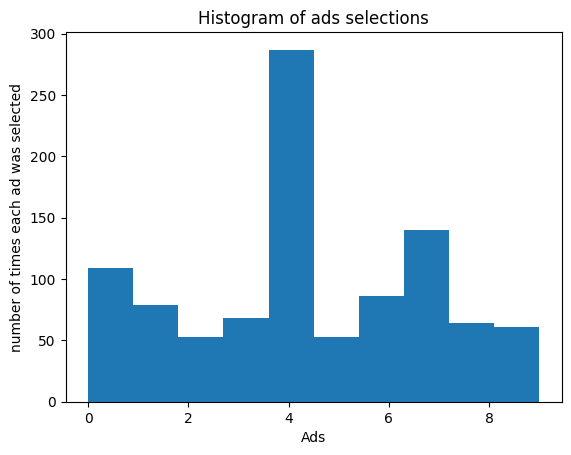

In [27]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('number of times each ad was selected')

plt.show()